Idea Summary: 

Tag line: Bring the stadium experience home 

Problem: 

Fans, athletes, and sponsors are missing the engagement of an in-arena experience 

Solution: 

app that brings in-game entertainment / jumbotron to the fans at home 

Application: 

Able to adjust which team you are cheering for 

Interactive in-game entertainment features like “kiss cam”, time-out games and 
promotions, music, noise meter, sponsor commercials, player videos

Fans can provide feedback through the noise meter

Real-time cheers for great plays in-arena for athletes to hear

Voting and streaming of replays

Special pre-game and post-game experiences like kids work-outs with players, autograph 
give-aways, one-on-one fan/player video chats

How it relates to the “Fluid Fan”

Grows with the fan (use unlocks features) 

Demo / Mock up 

For “fans”

Applicable to teams and events

NFL 

Hockey 

IOC 

NCAA 

User submission 

Dance cam / kiss cam 

noise meter 

“Likes” or shares of highlights 

Order merch & food 

Cheers 

Athlete content 

For Athletes / Teams 

Fan noise 

For Stadium (real time)

Noise 

Projection of home videos on jumbotron 

Backend Data 

Sponsorship data 


In [145]:
import pymongo
import arrow

In [146]:
import boto3 

In [147]:
from PIL import ImageDraw, ImageFont, Image, ImageFilter
import os
import PIL

In [148]:
from shutil import copyfile


In [149]:
def mergsimg(imgone, imgtwo, out):
    marimg = PIL.Image.open(imgone)
    earimg = PIL.Image.open(imgtwo)
    Image.alpha_composite(marimg, earimg).save(out)

    

In [150]:
with open('/home/pi/mongo.txt', 'r') as monconf:
    monc = monconf.read().replace('\n', '')

In [151]:
s3 = boto3.resource('s3')

In [152]:
def resizetemp(sourcefil, tempfile, outfil):
    #give source file and tempfile. resizes the tempfile to be the same as
    #source.
    simg = PIL.Image.open(sourcefil)
    timg = PIL.Image.open(tempfile)
    timg.resize(simg.size)
    timg.save(outfil)
    

#earimg = PIL.Image.open(imgtwo)

In [153]:
#resizetemp('/home/pi/git/reactionstream/reactionstream/test.png', '/home/pi/Downloads/th.png', 'hello.png')

In [154]:
#throw it out there. one quick change. fandom. top 5 in history. mount rushmore. kid photo of myself. incorputed into a scene. 

In [155]:
#marimg = PIL.Image.open('/home/pi/git/reactionstream/reactionstream/test.png')

#earimg = PIL.Image.open(imgtwo)

In [156]:
#marimg.size

In [157]:
#img = PIL.Image.open('/home/pi/Downloads/th.png')

In [158]:
#img.resize(marimg.size)

In [159]:
client = pymongo.MongoClient(monc)

In [160]:
db = client['reactionstream']

# Fetch our series collection
series_collection = db['reaction']

In [161]:
def mergeupload(img1, img2, output):
    mergsimg(img1, img2, output)
    data = open('' + output, 'rb')
    s3.Bucket('printrecsup').put_object(Key=output, Body=data)
    #rewrite as meta data for the reaction frame. 
    #timnow = arrow.now()
    #post = {'image' : 'https://printrecsup.s3.amazonaws.com/' + output, 
    #            'imgsize' : imgsize, 'username' : username, 'price' : price, 
    #            'quantity' : quantity, 'totalinvoice' : price * quantity, 
    #            'datetime': timnow.timestamp, 'datedue' : duedate.timestamp,
    #            'printer' : printcompany, 'status' : status, 
    #            'labels' : somelis}
    #return(series_collection.insert_one(post).inserted_id)

In [162]:
import subprocess

In [168]:
import PIL

In [171]:
def alphatemp(tempimg):
    #give it the template file and it removes white 
    #from the image. 
    img = Image.open(tempimg)
    img = img.convert("RGBA")

    pixdata = img.load()

    width, height = img.size
    for y in range(height):
        for x in range(width):
            if pixdata[x, y] == (255, 255, 255, 255):
                pixdata[x, y] = (255, 255, 255, 0)

    img.save(tempimg, "PNG")
    

In [172]:
#alphatemp('/home/pi/Documents/yui.png')

In [164]:
def resizegame(imgpath):
    imgp = os.listdir(imgpath)
    for imgs in imgp:
        bakimg = PIL.Image.open(imgpath + imgs)
        #print(bakimg.size)
        #print bakimg.width /2
        #bakimg.height / 2
        bakimg.resize((213, 120))
        print(bakimg.size)
        bakimg.save(imgpath + imgs)
        

In [166]:
def videotogif(tempfil, dirfol, dirsave, gifname):
    #os.system('ffmpeg -i {} {}/cut1-%03d.png'.format(videofile, dirfol))
    bakimg = PIL.Image.open('{}cut1-001.png'.format(dirfol))
    marimg = PIL.Image.open(tempfil).resize(bakimg.size)
    
    

    for indpn in os.listdir(dirfol):
        card = Image.new("RGBA", bakimg.size, (255, 255, 255))
        img = Image.open(dirfol + indpn).convert("RGBA")
        x, y = img.size
        card.paste(img, (0, 0, x, y), img)


        #mergsimg('resize.png', 'cut1-006.png', 'kia.png')
        #earimg = PIL.Image.open('/home/pi/Downloads/th.png')
        Image.alpha_composite(card, marimg).save(dirsave + indpn, format="png")

        #card.save('/home/pi/git/reactionstream/reactionstream/' + indpn, format="png")


    earthspin = os.listdir(dirsave)
    images = list()
    for filen in earthspin:
        images.append(imageio.imread(dirsave + filen))
    imageio.mimsave(gifname, images, fps=3)
    data = open(gifname, 'rb')
    s3.Bucket('printrecsup').put_object(Key=gifname, Body=data)


In [167]:
videotogif('/media/pi/2A7B-DD82/aceblack/Documents/devilharpy.png',
            '/media/pi/2A7B-DD82/sie/', '/media/pi/2A7B-DD82/oput/', 'afterhack.gif') # 

In [144]:
#ls oput

ls: cannot access 'oput': No such file or directory


In [1]:
#import os
#import glob
#from natsort import natsorted
#from moviepy.editor import *

#base_dir = os.path.realpath("./images")
#print(base_dir)

#gif_name = 'pic'
#fps = 24

#file_list = glob.glob('ttt/*.png')  # Get all the pngs in the current directory
#len(file_list)
#file_list_sorted = natsorted(file_list,reverse=False)  # Sort the images

#clips = [ImageClip(m).set_duration(2)
#         for m in file_list_sorted]

#concat_clip = concatenate_videoclips(clips, method="compose")
#concat_clip.write_videofile("test.mp4", fps=30)

/home/pi/git/reactionstream/reactionstream/images


t:   0%|          | 0/18000 [00:00<?, ?it/s, now=None]

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


In [ ]:
#bakimg.save()

In [128]:
#mergsimg('resize.png', 'cut1-006.png', 'kia.png')

In [129]:
#myimg = PIL.Image.open('kia.png')

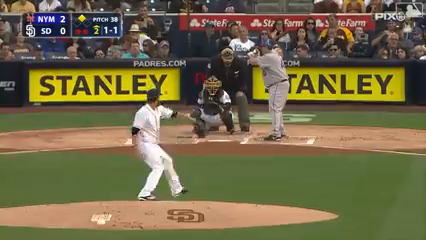

In [130]:
#myimg

In [134]:
#Image.alpha_composite(myimg,marresiz).save('some.png')

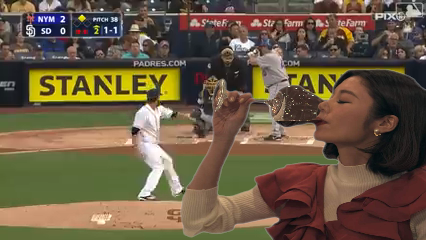

In [135]:
#PIL.Image.open('some.png')

In [43]:
#os.system('ffmpeg -i RxZR6bTi29g.mp4 ttt/cut1-%03d.png')

0

In [21]:
def videotoframe(filvid, tempvid, outfile):
    os.system('ffmpeg -i {} cut1-%03d.png'.format(filvid))
    #bakimg = PIL.Image.open('cut1-001.png')
    #bakimg.size
    #resizetemp(bakimg, tempvid, outfile)
    #check size of outputed pngs. resize the overlay image to match
    #merge overlay image to this background image. 

In [29]:
def resizvid(btemp, outputf): 
    #bakimg = PIL.Image.open('cut1-001.png')
    #bakimg.size
    resizetemp('cut1-001.png', btemp, outputf)

In [30]:
#resizvid('/home/pi/Downloads/th.png', 'out.png')

In [57]:
#videotoframe('EKN2U3nHZpQ.mp4', 
#            '/home/pi/Downloads/th.png', 'hi.png')

In [58]:
#mergeupload('cut1-100.png', 'hi.png', 'fin.png')

In [59]:
#videotoframe('/home/pi/xUGcCApcAVI.mp4')

In [60]:
#mergsimg('/home/pi/Downloads/thbase.png', '/home/pi/Downloads/th.png', 'drink.png')

In [61]:
#data = open('' + 'drink.png', 'rb')

In [62]:
#data

In [17]:
#s3.Bucket('printrecsup').put_object(Key='drink.png', Body=data)

s3.Object(bucket_name='printrecsup', key='drink.png')